In [1]:
from netCDF4 import Dataset
import netCDF4 as netcdf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib as mpl

#mapping
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.io import shapereader
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

import xarray as xr
import xarray.ufuncs as xu
from scipy.interpolate import griddata
#from pyresample.geometry import SwathDefinition
#from pyresample.kd_tree import resample_nearest

In [2]:
hfr_loc = "./data/hf_radar_05_2020.nc" 

In [3]:
hfrdata = xr.open_dataset(hfr_loc)

In [4]:
lat_hfr=hfrdata.variables['lat'][:]
lon_hfr=hfrdata.variables['lon'][:]
time_hfr=hfrdata.variables['time'][:]


In [19]:
print(lat_hfr.shape)
print(lon_hfr.shape)

(56,)
(52,)


In [11]:
u_hfr=hfrdata.variables['u'][0,:,:]
v_hfr=hfrdata.variables['v'][0,:,:]

In [25]:
CurrMag=np.sqrt(u_hfr**2+v_hfr**2)
print(CurrMag)

<xarray.Variable (lat: 56, lon: 52)>
array([[       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       ...,
       [       nan,        nan,        nan, ..., 0.12165525, 0.1264911 ,
        0.15264337],
       [       nan,        nan,        nan, ..., 0.1118034 , 0.18027756,
        0.1720465 ],
       [       nan,        nan,        nan, ..., 0.12369317, 0.11661904,
        0.1360147 ]], dtype=float32)


In [28]:
x_hfr, y_hfr = np.meshgrid(lon_hfr,lat_hfr)
newx = x_hfr.ravel()
newy = y_hfr.ravel()
newCurrMag = CurrMag.values.ravel()
index = ~np.isnan(newCurrMag)
hfr_speed = newCurrMag[index]
hfr_x = newx[index]
hfr_y = newy[index]

In [31]:
hfr_speed.shape,hfr_x.shape,hfr_y.shape

((1732,), (1732,), (1732,))

In [5]:
cmems_loc = "./data/CMEMS-global-analysis-forecast-phy-001-024-hourly-u-v.nc" 

In [6]:
cmemsdata = xr.open_dataset(cmems_loc)

In [7]:
lat_cmems=cmemsdata.variables['latitude'][:]
lon_cmems=cmemsdata.variables['longitude'][:]
time_cmems=cmemsdata.variables['time'][:]

In [14]:
u_cmems=np.squeeze(cmemsdata.variables['uo'][0,:,:,:])
v_cmems=np.squeeze(cmemsdata.variables['vo'][0,:,:,:])
t_cmems = time_cmems.values[0]

In [15]:
CurrMag_cmems=np.sqrt(u_cmems**2+v_cmems**2)

In [16]:
x_cmems, y_cmems = np.meshgrid(lon_cmems,lat_cmems)

In [32]:
Ti = griddata((hfr_x, hfr_y), hfr_speed, (x_cmems, y_cmems), method='linear')

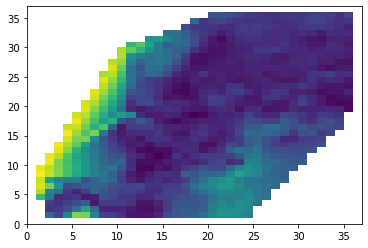

In [34]:
plt.pcolormesh(Ti)